In [89]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random

In [90]:
# 1-Filter’s trackbar (gaussian,averaging,median,bilateral)
img = cv2.imread('Image1.jpg')
cv2.namedWindow('Image')

def Nothing(x):
    pass

cv2.createTrackbar("ksize", 'Image', 0, 50, Nothing)
cv2.createTrackbar("Mode", 'Image', 0, 3, Nothing)
res = None

while True:

    ksize = cv2.getTrackbarPos("ksize", 'Image') +1
    mode = cv2.getTrackbarPos("Mode", 'Image') +1

    if mode == 1:
        mode_name = 'Averaging'
        res = cv2.blur(img, (ksize,ksize))
    elif mode == 2:
        mode_name = 'Gaussian Blur'
        res = cv2.GaussianBlur(img, (2*ksize+1,2*ksize+1), 0)
    elif mode == 3:
        mode_name = 'Median Blur'
        res = cv2.medianBlur(img, 2*ksize+1)
    elif mode == 4:
        mode_name = 'Bilateral Filter'
        res = cv2.bilateralFilter(img, 9, ksize, ksize)

    cv2.putText(res, mode_name, (50,100), cv2.FONT_HERSHEY_SIMPLEX, 3, (255,0,0), 4)
    cv2.imshow('Image', res)
    
    k = cv2.waitKey(1)
    if k == ord('q'):
        break

print('Destroying....')
cv2.destroyAllWindows()

Destroying....


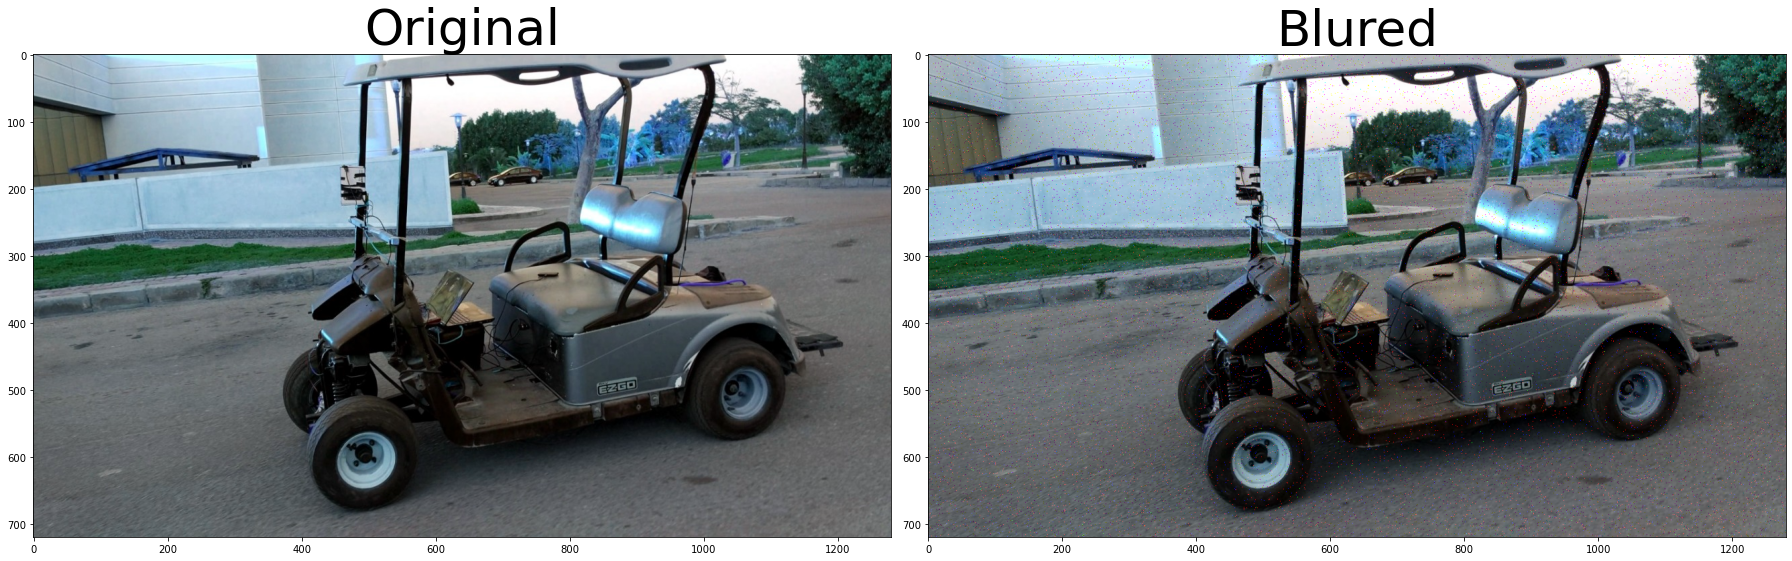

In [91]:
# 2-search and implement (salt and piper noise)
def add_noise(img):
	row , col = img.shape

	# Assign random pixels to be white
	number_of_pixels = random.randint(300, 10000)
	for i in range(number_of_pixels):
		y_coord=random.randint(0, row - 1)
		x_coord=random.randint(0, col - 1)
		img[y_coord][x_coord] = 255

	# Assign random pixels to be black
	number_of_pixels = random.randint(300 , 10000)
	for i in range(number_of_pixels):
		y_coord=random.randint(0, row - 1)
		x_coord=random.randint(0, col - 1)
		img[y_coord][x_coord] = 0
		
	return img

img = cv2.imread('Image1.jpg')
blur = img.copy()

if len(img.shape) == 2:
	blur = add_noise(blur)
else:
	for ch in range(img.shape[2]):
		blur[:,:,ch] = add_noise(blur[:,:,ch])

plt.figure(figsize=(25,50))
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Original', size=50)
plt.subplot(122)
plt.imshow(blur, cmap='gray')
plt.title('Blured', size=50)
plt.tight_layout()
